In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sea
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import xgboost as xgb
import tensorflow as tf


In [2]:
df = pd.read_csv('SolAtasIMC_tratado.csv')
df.head()

,date,open,high,low,close,value
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25,75
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15,75
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30,75
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,75
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,75


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36400 entries, 0 to 36399
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    36400 non-null  object 
 1   open    36400 non-null  float64
 2   high    36400 non-null  float64
 3   low     36400 non-null  float64
 4   close   36400 non-null  float64
 5   value   36400 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.7+ MB
None


# Preprocesado de Datos

In [4]:
tamanio = df.shape[0]

In [5]:
df_train = df.copy().loc[0:int(tamanio*0.7)]
df_train

,date,open,high,low,close,value
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25,75
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15,75
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30,75
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,75
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,75
...,...,...,...,...,...,...
25476,2023-07-11 21:00:00,22.00,22.05,21.90,22.00,57
25477,2023-07-11 22:00:00,22.00,22.10,21.90,22.00,57
25478,2023-07-11 23:00:00,22.00,22.05,21.75,21.95,57
25479,2023-07-12 00:00:00,21.95,22.10,21.90,22.05,64


In [6]:
df_vali = df.copy().loc[int(tamanio*0.7 + 1):int(tamanio*0.9)]
df_vali

,date,open,high,low,close,value
25481,2023-07-12 02:00:00,22.10,22.30,22.05,22.15,64
25482,2023-07-12 03:00:00,22.15,22.25,22.10,22.10,64
25483,2023-07-12 04:00:00,22.10,22.10,22.00,22.00,64
25484,2023-07-12 05:00:00,22.00,22.00,21.90,21.95,64
25485,2023-07-12 06:00:00,21.95,22.05,21.90,22.00,64
...,...,...,...,...,...,...
32756,2024-05-10 05:00:00,153.65,154.35,152.85,153.95,66
32757,2024-05-10 06:00:00,153.95,154.70,153.45,153.75,66
32758,2024-05-10 07:00:00,153.75,154.10,152.30,153.30,66
32759,2024-05-10 08:00:00,153.30,155.10,153.15,154.95,66


In [7]:
df_test = df.copy().loc[int(tamanio*0.9 + 1):tamanio]
df_test

,date,open,high,low,close,value
32761,2024-05-10 10:00:00,154.35,154.5,153.45,154.10,66
32762,2024-05-10 11:00:00,154.10,154.8,153.25,154.15,66
32763,2024-05-10 12:00:00,154.15,154.3,153.25,154.15,66
32764,2024-05-10 13:00:00,154.15,155.2,153.00,155.05,66
32765,2024-05-10 14:00:00,155.05,155.4,153.10,153.30,66
...,...,...,...,...,...,...
36395,2024-10-08 20:00:00,143.35,143.9,142.35,142.95,49
36396,2024-10-08 21:00:00,142.95,144.1,142.25,143.75,49
36397,2024-10-08 22:00:00,143.75,144.5,143.35,144.50,49
36398,2024-10-08 23:00:00,144.50,144.7,144.05,144.25,49


# Declaramos y Entrenamos el modelo

In [8]:
numhoras = 12

Declaramos el modelo

In [9]:
regr1 = RandomForestRegressor(max_depth=100, random_state=0)

Funció que prepara un dataset en el formato requerido por RandomForest

In [10]:
def preparar_datosRandomForest(df):
    X = []
    y= []
    for i in range(0, df.shape[0] - numhoras):
        auxy = df.iloc[i + numhoras]
        y.append(auxy.close)
        aux1 = []
        for e in range(0, numhoras):
            aux = df.iloc[i + e]
            for r in range(1, aux.size):
                aux1.append(aux[r])
        X.append(aux1)
    return (X, y)

In [11]:
data = preparar_datosRandomForest(df_train)
X1 = data[0]
y1 = data[1]

C:\Users\raulg\AppData\Local\Temp\ipykernel_17792\235810762.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux1.append(aux[r])


Entrenamos el modelo con los datos de entrenamiento

In [12]:
regr1.fit(X1, y1)

RandomForestRegressor(max_depth=100, random_state=0)

Preparamos los datos de validación

In [13]:
data = preparar_datosRandomForest(df_vali)
Vali = data[0]
Valirpr = data[1]

C:\Users\raulg\AppData\Local\Temp\ipykernel_17792\235810762.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux1.append(aux[r])


Realizamos una predicción usando los datos de validación

In [14]:
predict = regr1.predict(Vali)
print(predict)

[ 22.0875  22.4055  22.488  ... 153.077  152.6875 155.6295]


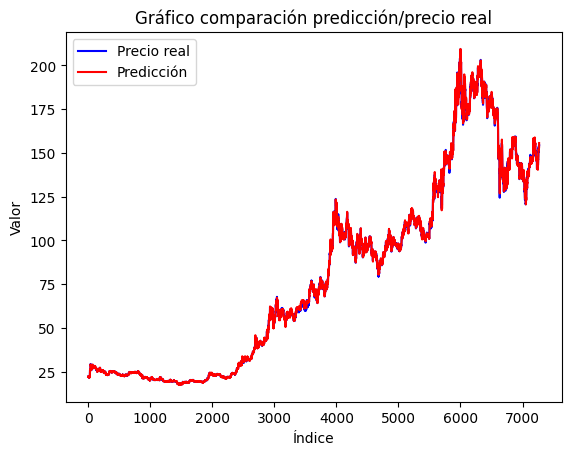

In [15]:
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(predict, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [16]:
suma = 0
n = len(Valirpr)
mae = np.mean(np.abs(Valirpr - predict))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict[i] - Valirpr[i])/Valirpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 0.7623112272977421
El error medio porcentualemente es: 0.9064477075861188


Ahora los valores de test

In [17]:
data = preparar_datosRandomForest(df_test)
Test = data[0]
Testrpr = data[1]

C:\Users\raulg\AppData\Local\Temp\ipykernel_17792\235810762.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux1.append(aux[r])


In [18]:
predictT = regr1.predict(Test)
print(predictT)

[146.7795 146.18   146.0045 ... 143.064  143.1175 143.3565]


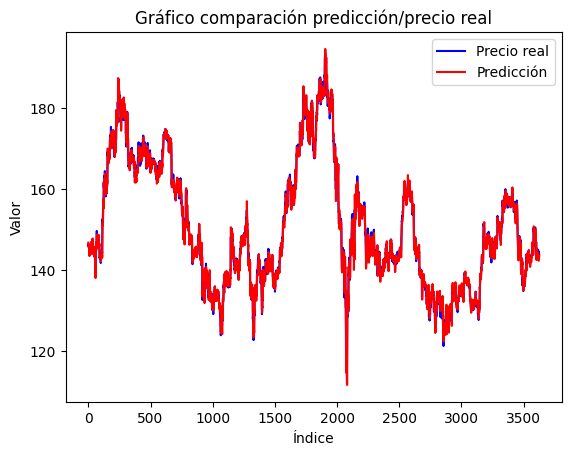

In [19]:
plt.plot(Testrpr, color='blue', label='Precio real')  # Línea azul
plt.plot(predictT, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [20]:
suma = 0
n = len(Testrpr)
mae = np.mean(np.abs(Testrpr - predictT))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predictT[i] - Testrpr[i])/Testrpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.050529638819959
El error medio porcentualemente es: 0.7052119906404417


Desarrollamos un algoritmo para entrenar distintas instacias con distintos parámetros y compararlas

In [21]:
def evalRandomForest(Testrpr, predictT):
    suma = 0
    n = len(Testrpr)
    for i in range(0,n):
        suma = abs(predictT[i] - Testrpr[i])/Testrpr[i] +  suma
    error_medio = suma/n
    emp = error_medio*100 # error medio en porcentaje
    return emp

In [22]:
def train_randomForest(ini, fin):
    posbest = 0
    best = 100
    for i in range(ini, fin):
        regr1 = RandomForestRegressor(max_depth=100, random_state=i)
        regr1.fit(X1, y1)
        predictT = regr1.predict(Test)
        valor = evalRandomForest(Testrpr, predictT)
        if valor < best:
            best = valor
            posbest = i
    print(best)
    print(posbest)
        

In [23]:
train_randomForest(0, 50)

KeyboardInterrupt: 

In [ ]:
def train_randomForestdepth(ini, fin):
    posbest = 0
    best = 100
    for i in range(ini, fin):
        regr1 = RandomForestRegressor(max_depth=i, random_state=0)
        regr1.fit(X1, y1)
        predictT = regr1.predict(Test)
        valor = evalRandomForest(Testrpr, predictT)
        print(str(i) + " " + str(round(valor, 4)))
        if valor < best:
            best = valor
            posbest = i
    print(best)
    print(posbest)

In [ ]:
train_randomForestdepth(1, 30)

1 7.852
2 17.6033
3 4.7748
4 2.2934
5 1.3099
6 0.9634
7 0.8974
8 0.904
9 0.9135
10 0.9284
11 0.9472
12 0.9647
13 0.9761
14 0.9882
15 1.0007
16 1.0088
17 1.0117
18 1.0156
19 1.0163
20 1.016
21 1.0158
22 1.0191
23 1.0175
24 1.0178
25 1.0173
26 1.0176
27 1.0165
28 1.0172
29 1.018
0.897413025734916
7


# Predicción Utilizando XGBoost

Función que prepara el dataset en función del número de horas anteriores que se quiera considerar

Ponemos los datos en el formato correcto

In [ ]:
df_xgb = df.copy()
df_xgb['open_before'] = df_xgb['open'].shift(+1)
df_xgb['high_before'] = df_xgb['high'].shift(+1)
df_xgb['low_before'] = df_xgb['low'].shift(+1)
df_xgb['close_before'] = df_xgb['close'].shift(+1)
df_xgb['value_before'] = df_xgb['value'].shift(+1)
df_xgb['close_next'] = df_xgb['close'].shift(-1)


In [ ]:
def create_df_n(df, n):
    df_aux = df.copy()
    for i in range(1, n):
        df_aux['open_before' + str(i)] = df_aux['open'].shift(+i)
        df_aux['high_before' + str(i)] = df_aux['high'].shift(+i)
        df_aux['low_before' + str(i)] = df_aux['low'].shift(+i)
        df_aux['close_before' + str(i)] = df_aux['close'].shift(+i)
        df_aux['value_before' + str(i)] = df_aux['value'].shift(+i)
    df_aux['close_next'] = df_aux['close'].shift(-1)
    df_aux = df_aux.dropna()
    return df_aux
    

In [ ]:
df_xgb = create_df_n(df, 4)

In [ ]:
df_xgb = df_xgb.dropna()
df_xgb

,date,open,high,low,close,value,open_before,high_before,low_before,close_before,value_before,close_next
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15,75,3.10,3.35,3.10,3.25,75.0,3.30
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30,75,3.25,3.25,3.15,3.15,75.0,3.30
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,75,3.15,3.30,3.15,3.30,75.0,3.25
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,75,3.30,3.30,3.15,3.30,75.0,3.25
5,2020-08-12 08:00:00,3.25,3.30,3.15,3.25,75,3.25,3.25,3.20,3.25,75.0,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...
36394,2024-10-08 19:00:00,143.80,143.95,142.40,143.35,49,142.80,143.95,141.75,143.80,49.0,142.95
36395,2024-10-08 20:00:00,143.35,143.90,142.35,142.95,49,143.80,143.95,142.40,143.35,49.0,143.75
36396,2024-10-08 21:00:00,142.95,144.10,142.25,143.75,49,143.35,143.90,142.35,142.95,49.0,144.50
36397,2024-10-08 22:00:00,143.75,144.50,143.35,144.50,49,142.95,144.10,142.25,143.75,49.0,144.25


In [ ]:
tamanio_xgb = df_xgb.shape[0]
tamanio_xgb

36396

In [ ]:
df_train_xgb = df_xgb.copy().loc[0:int(tamanio_xgb*0.7)]
df_train_xgb

,date,open,high,low,close,value,open_before1,high_before1,low_before1,close_before1,...,high_before2,low_before2,close_before2,value_before2,open_before3,high_before3,low_before3,close_before3,value_before3,close_next
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,75,3.15,3.30,3.15,3.30,...,3.25,3.15,3.15,75.0,3.10,3.35,3.10,3.25,75.0,3.25
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,75,3.30,3.30,3.15,3.30,...,3.30,3.15,3.30,75.0,3.25,3.25,3.15,3.15,75.0,3.25
5,2020-08-12 08:00:00,3.25,3.30,3.15,3.25,75,3.25,3.25,3.20,3.25,...,3.30,3.15,3.30,75.0,3.15,3.30,3.15,3.30,75.0,3.40
6,2020-08-12 09:00:00,3.25,3.40,3.25,3.40,75,3.25,3.30,3.15,3.25,...,3.25,3.20,3.25,75.0,3.30,3.30,3.15,3.30,75.0,3.45
7,2020-08-12 10:00:00,3.35,3.55,3.35,3.45,75,3.25,3.40,3.25,3.40,...,3.30,3.15,3.25,75.0,3.25,3.25,3.20,3.25,75.0,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25473,2023-07-11 18:00:00,22.15,22.20,21.95,22.10,57,22.20,22.25,21.90,22.15,...,22.40,21.95,22.20,57.0,22.25,22.30,22.00,22.10,57.0,22.10
25474,2023-07-11 19:00:00,22.10,22.20,22.00,22.10,57,22.15,22.20,21.95,22.10,...,22.25,21.90,22.15,57.0,22.10,22.40,21.95,22.20,57.0,22.00
25475,2023-07-11 20:00:00,22.10,22.10,21.95,22.00,57,22.10,22.20,22.00,22.10,...,22.20,21.95,22.10,57.0,22.20,22.25,21.90,22.15,57.0,22.00
25476,2023-07-11 21:00:00,22.00,22.05,21.90,22.00,57,22.10,22.10,21.95,22.00,...,22.20,22.00,22.10,57.0,22.15,22.20,21.95,22.10,57.0,22.00


In [ ]:
df_vali_xgb = df_xgb.copy().loc[int(tamanio_xgb*0.7 + 1):int(tamanio_xgb*0.9)]
df_vali_xgb

,date,open,high,low,close,value,open_before1,high_before1,low_before1,close_before1,...,high_before2,low_before2,close_before2,value_before2,open_before3,high_before3,low_before3,close_before3,value_before3,close_next
25478,2023-07-11 23:00:00,22.00,22.05,21.75,21.95,57,22.00,22.10,21.90,22.00,...,22.05,21.90,22.00,57.0,22.10,22.10,21.95,22.00,57.0,22.05
25479,2023-07-12 00:00:00,21.95,22.10,21.90,22.05,64,22.00,22.05,21.75,21.95,...,22.10,21.90,22.00,57.0,22.00,22.05,21.90,22.00,57.0,22.10
25480,2023-07-12 01:00:00,22.05,22.15,22.00,22.10,64,21.95,22.10,21.90,22.05,...,22.05,21.75,21.95,57.0,22.00,22.10,21.90,22.00,57.0,22.15
25481,2023-07-12 02:00:00,22.10,22.30,22.05,22.15,64,22.05,22.15,22.00,22.10,...,22.10,21.90,22.05,64.0,22.00,22.05,21.75,21.95,57.0,22.10
25482,2023-07-12 03:00:00,22.15,22.25,22.10,22.10,64,22.10,22.30,22.05,22.15,...,22.15,22.00,22.10,64.0,21.95,22.10,21.90,22.05,64.0,22.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32752,2024-05-10 01:00:00,152.95,153.15,151.20,152.60,66,150.35,153.40,150.15,152.95,...,150.85,149.60,150.35,55.0,150.85,151.50,149.25,150.25,55.0,152.05
32753,2024-05-10 02:00:00,152.60,153.25,151.35,152.05,66,152.95,153.15,151.20,152.60,...,153.40,150.15,152.95,66.0,150.25,150.85,149.60,150.35,55.0,153.40
32754,2024-05-10 03:00:00,152.05,155.00,151.45,153.40,66,152.60,153.25,151.35,152.05,...,153.15,151.20,152.60,66.0,150.35,153.40,150.15,152.95,66.0,153.65
32755,2024-05-10 04:00:00,153.40,153.80,152.70,153.65,66,152.05,155.00,151.45,153.40,...,153.25,151.35,152.05,66.0,152.95,153.15,151.20,152.60,66.0,153.95


In [ ]:
df_test_xgb = df_xgb.copy().loc[int(tamanio_xgb*0.9 + 1):tamanio_xgb]
df_test_xgb

,date,open,high,low,close,value,open_before1,high_before1,low_before1,close_before1,...,high_before2,low_before2,close_before2,value_before2,open_before3,high_before3,low_before3,close_before3,value_before3,close_next
32757,2024-05-10 06:00:00,153.95,154.70,153.45,153.75,66,153.65,154.35,152.85,153.95,...,153.80,152.70,153.65,66.0,152.05,155.00,151.45,153.40,66.0,153.30
32758,2024-05-10 07:00:00,153.75,154.10,152.30,153.30,66,153.95,154.70,153.45,153.75,...,154.35,152.85,153.95,66.0,153.40,153.80,152.70,153.65,66.0,154.95
32759,2024-05-10 08:00:00,153.30,155.10,153.15,154.95,66,153.75,154.10,152.30,153.30,...,154.70,153.45,153.75,66.0,153.65,154.35,152.85,153.95,66.0,154.35
32760,2024-05-10 09:00:00,154.95,155.75,154.25,154.35,66,153.30,155.10,153.15,154.95,...,154.10,152.30,153.30,66.0,153.95,154.70,153.45,153.75,66.0,154.10
32761,2024-05-10 10:00:00,154.35,154.50,153.45,154.10,66,154.95,155.75,154.25,154.35,...,155.10,153.15,154.95,66.0,153.75,154.10,152.30,153.30,66.0,154.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36392,2024-10-08 17:00:00,144.15,144.40,141.20,142.80,49,145.05,145.55,142.45,144.15,...,145.10,142.70,145.05,49.0,144.50,144.60,143.25,143.30,49.0,143.80
36393,2024-10-08 18:00:00,142.80,143.95,141.75,143.80,49,144.15,144.40,141.20,142.80,...,145.55,142.45,144.15,49.0,143.30,145.10,142.70,145.05,49.0,143.35
36394,2024-10-08 19:00:00,143.80,143.95,142.40,143.35,49,142.80,143.95,141.75,143.80,...,144.40,141.20,142.80,49.0,145.05,145.55,142.45,144.15,49.0,142.95
36395,2024-10-08 20:00:00,143.35,143.90,142.35,142.95,49,143.80,143.95,142.40,143.35,...,143.95,141.75,143.80,49.0,144.15,144.40,141.20,142.80,49.0,143.75


Definimos las características para el entrenamiento

In [ ]:
def preparar_datosXGBoost2(df):
    X = df[['open', 'high', 'low', 'close', 'value', 'open_before', 'high_before', 'low_before', 'close_before', 'value_before']] 
    y = df['close_next']
    return xgb.DMatrix(data=X, label=y)

In [ ]:
def preparar_datosXGBoost4(df):
    X = df[['open', 'high', 'low', 'close', 'value', 'open_before1', 'high_before1', 'low_before1', 'close_before1', 'value_before1',  'open_before2', 'high_before2', 'low_before2', 'close_before2', 'value_before2',  'open_before3', 'high_before3', 'low_before3', 'close_before3', 'value_before3']] 
    y = df['close_next']
    return xgb.DMatrix(data=X, label=y)

In [ ]:
dtrain = preparar_datosXGBoost4(df_train_xgb)
dvali = preparar_datosXGBoost4(df_vali_xgb)

In [ ]:
param = {'max_depth': 10, 'eta': 0.1, 'objective': 'reg:squarederror'}
evals = [(dtrain, 'train'), (dvali, 'validacion')]

In [ ]:
bst = xgb.train(param, dtrain, num_boost_round=10)

In [ ]:
bst = xgb.train(param, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=10, verbose_eval=10) # No se puede ejecutar con los parámetros evals=evals, early_stopping_rounds=10 

[0]	train-rmse:52.03299	validacion-rmse:55.11421
[10]	train-rmse:18.24048	validacion-rmse:19.29041
[20]	train-rmse:6.46525	validacion-rmse:6.92503
[30]	train-rmse:2.45772	validacion-rmse:2.93838
[40]	train-rmse:1.21372	validacion-rmse:2.13513
[50]	train-rmse:0.89428	validacion-rmse:2.09726
[53]	train-rmse:0.85837	validacion-rmse:2.08875


Predicción con los datos de validación

In [ ]:
predict_xgb = bst.predict(dvali)
print(predict_xgb)

[ 21.958433  22.11483   22.142443 ... 153.86331  152.21484  152.35335 ]


Comprobación de tasa de error en los datos de validación

In [ ]:
Valirpr_xgb = []
for i in range(0,df_vali_xgb.shape[0]):
    Valirpr_xgb.append(df_vali_xgb.iloc[i].close)

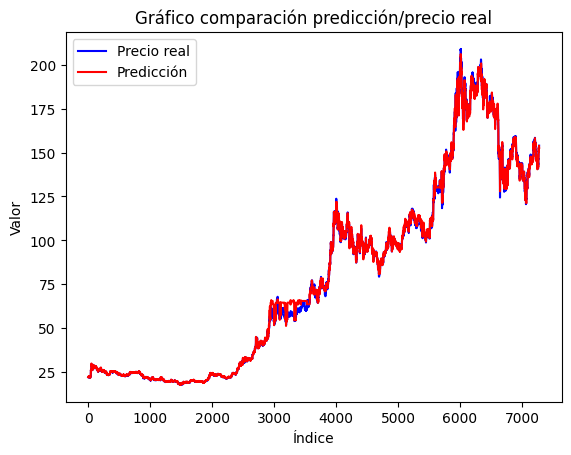

In [ ]:
plt.plot(Valirpr_xgb, color='blue', label='Precio real')  # Línea azul
plt.plot(predict_xgb, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [ ]:
suma = 0
n = len(Valirpr_xgb)
mae = np.mean(np.abs(Valirpr_xgb - predict_xgb))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict_xgb[i] - Valirpr_xgb[i])/Valirpr_xgb[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 0.9155151252940485
El error medio porcentualemente es: 1.2158699972019795


Predicción con los datos de test

In [ ]:
dtest = preparar_datosXGBoost4(df_test_xgb)

In [ ]:
predict_xgb_test = bst.predict(dtest)
print(predict_xgb_test)

[153.77048 152.14227 154.00761 ... 142.23935 142.23935 142.23935]


Comprobación de la tasa de error en los datos de test

In [ ]:
Test_xgb = []
for i in range(0,df_test_xgb.shape[0]):
    Test_xgb.append(df_test_xgb.iloc[i].close)

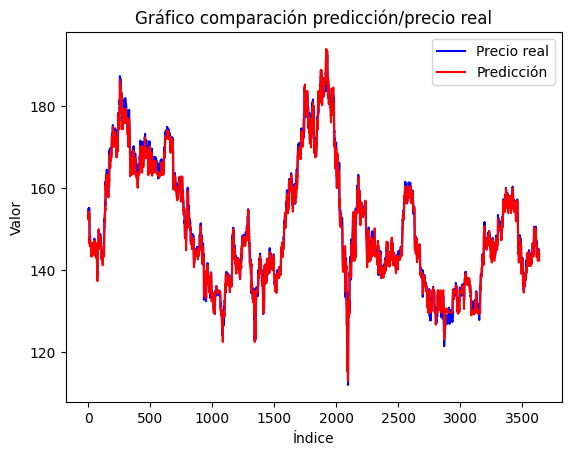

In [ ]:
plt.plot(Test_xgb, color='blue', label='Precio real')  # Línea azul
plt.plot(predict_xgb_test, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [ ]:
suma = 0
n = len(Test_xgb)
mae = np.mean(np.abs(Test_xgb - predict_xgb_test))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict_xgb_test[i] - Test_xgb[i])/Test_xgb[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 0.8909873677348042
El error medio porcentualemente es: 0.593536350393672


In [ ]:
def evalXGB(Test_xgb, predict_xgb_test):
    suma = 0
    n = len(Test_xgb)
    for i in range(0,n):
        suma = abs(predict_xgb_test[i] - Test_xgb[i])/Test_xgb[i] +  suma
    error_medio = suma/n
    emp = error_medio*100 # error medio en porcentaje
    return emp

In [ ]:
def train_XGB(num_boost_round, early_stop):
    bstaux = xgb.train(param, dtrain, num_boost_round=num_boost_round, evals=evals, early_stopping_rounds=early_stop, verbose_eval=10)
    predict_xgb_test = bstaux.predict(dtest)
    valor = evalXGB(Test_xgb, predict_xgb_test)
    print(valor)

In [ ]:
train_XGB(100, 10)

[0]	train-rmse:52.03058	validacion-rmse:55.14741
[10]	train-rmse:18.24075	validacion-rmse:19.29663
[20]	train-rmse:6.47113	validacion-rmse:6.89713
[30]	train-rmse:2.49259	validacion-rmse:2.78981
[40]	train-rmse:1.33772	validacion-rmse:1.70668
[50]	train-rmse:1.09531	validacion-rmse:1.52521
[60]	train-rmse:1.05078	validacion-rmse:1.50811
[70]	train-rmse:1.03892	validacion-rmse:1.50938
[71]	train-rmse:1.03808	validacion-rmse:1.50983
0.7275942239749614


# Predicción usando red neuronal

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
numhorasredes = 14

In [ ]:
def preparar_datosRedDensa(df):
    X = []
    y = []
    for i in range(0, df.shape[0] - numhorasredes - 1):
        auxx = []
        for r in range(0, numhorasredes):
            aux = df.iloc[i + r]
            auxx.append(aux.open)
            auxx.append(aux.high)   
            auxx.append(aux.low)   
            auxx.append(aux.close)
            auxx.append(aux.value)
        y.append(df.iloc[i+ numhorasredes].close)  
        X.append(auxx)       
    X = np.array(X)   
    y = np.array(y) 
    return(X, y)
    

In [ ]:
X_train, y_train = preparar_datosRedDensa(df_train)

In [ ]:
X_train[0]

array([ 3.1 ,  3.35,  3.1 ,  3.25, 75.  ,  3.25,  3.25,  3.15,  3.15,
       75.  ,  3.15,  3.3 ,  3.15,  3.3 , 75.  ,  3.3 ,  3.3 ,  3.15,
        3.3 , 75.  ,  3.25,  3.25,  3.2 ,  3.25, 75.  ,  3.25,  3.3 ,
        3.15,  3.25, 75.  ,  3.25,  3.4 ,  3.25,  3.4 , 75.  ,  3.35,
        3.55,  3.35,  3.45, 75.  ,  3.45,  3.7 ,  3.4 ,  3.7 , 75.  ,
        3.7 ,  3.95,  3.5 ,  3.9 , 75.  ,  3.9 ,  3.95,  3.65,  3.7 ,
       75.  ,  3.7 ,  3.8 ,  3.65,  3.7 , 75.  ,  3.7 ,  3.85,  3.65,
        3.75, 75.  ,  3.75,  3.9 ,  3.75,  3.85, 75.  ])

In [ ]:
X_vali, y_vali = preparar_datosRedDensa(df_vali)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(numhorasredes*5,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mape')

C:\Users\raulg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_vali, y_vali), shuffle=False)


Epoch 1/10
796/796 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - loss: 23.4019 - val_loss: 4.3048
Epoch 2/10
796/796 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 19.3197 - val_loss: 6.2817
Epoch 3/10
796/796 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 28.9199 - val_loss: 4.8325
Epoch 4/10
796/796 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 11.4533 - val_loss: 6.2897
Epoch 5/10
796/796 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 11.2878 - val_loss: 2.0281
Epoch 6/10
796/796 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 6.1666 - val_loss: 2.3427
Epoch 7/10
796/796 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 7.3163 - val_loss: 1.3072
Epoch 8/10
796/796 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 5.7291 - val_loss: 2.4516
Epoch 9/10
796/796 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 11.8863 - val_loss: 4.0369
Epoch 10/10
796/796 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 8.8750 - val_loss: 2.2585


In [ ]:
y_pred = model.predict(X_vali)
y_pred

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step


array([[ 22.706581],
       [ 22.795422],
       [ 22.869574],
       ...,
       [147.79382 ],
       [148.661   ],
       [148.3366  ]], dtype=float32)

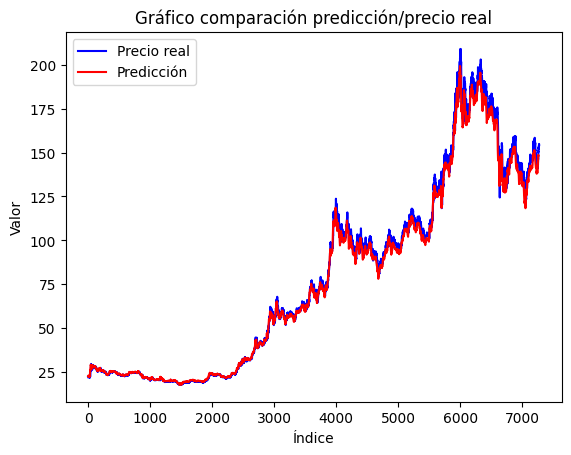

In [ ]:
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_pred, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [ ]:
print(len(y_pred))

7265


In [ ]:
suma = 0
y_pred = y_pred.flatten()
n = y_vali.size
mae = np.mean(np.abs(y_vali - y_pred))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred[i] - y_vali[i])/y_vali[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 2.221731791748971
El error medio porcentualemente es: 2.2585110920682157


In [ ]:
model.save('mi_modelo_denso3_96.h5')

# Implementación con red neuronal LSTM

In [ ]:
from tensorflow.keras.layers import LSTM

Función que crea un array de que contiene a su vez arrays que contienen cada uno un array de tamaño 4 por cada hora anterior que se considere

In [ ]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps, 3])  
    return np.array(X), np.array(y)

Función para preparar os datos en el formato requerido

In [ ]:
def preparar_datosRedLSTM(df):
    df_aux = df[['open', 'high', 'low', 'close', 'value']].values
    X, y = create_sequences(df_aux, numhorasredes)
    return X, y

Preparamos los datos en el formato requerido

In [ ]:
X_trainLSTM, y_trainLSTM = preparar_datosRedLSTM(df_train)
X_valiLSTM, y_valiLSTM = preparar_datosRedLSTM(df_vali)
X_testLSTM, y_testLSTM = preparar_datosRedLSTM(df_test)

Declaramos la estructura de la red neuronal

In [ ]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(64, activation='relu', input_shape=(numhorasredes, 5)))
modelLSTM.add(Dense(1))

C:\Users\raulg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compilamos la red

In [ ]:
modelLSTM.compile(optimizer='adam', loss='mape')

Entrenamos la red usando los datos de train para entrenar y los de validación para validar

In [ ]:
historyLSTM = modelLSTM.fit(X_trainLSTM, y_trainLSTM, epochs=20, batch_size=32, validation_data=(X_valiLSTM, y_valiLSTM), shuffle=False)

Epoch 1/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.0222 - val_loss: 1.9572
Epoch 2/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.8943 - val_loss: 2.1085
Epoch 3/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.3130 - val_loss: 2.2757
Epoch 4/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.7812 - val_loss: 2.0245
Epoch 5/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.8841 - val_loss: 2.0680
Epoch 6/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.5225 - val_loss: 1.9321
Epoch 7/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.9024 - val_loss: 1.5007
Epoch 8/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.0217 - val_loss: 1.3410
Epoch 9/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.9460 - val_loss: 1.4503
Epoch 10/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.6179 - val_loss: 1.9656
Epoch 11/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.2220 - val_loss: 1.5256
Epoch 12/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Hacemos una predicción usando los datos de validación

In [ ]:
y_predLSTM = modelLSTM.predict(X_valiLSTM)
y_predLSTM = y_predLSTM.flatten()

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step


Comparamos la predicción con los datos reales de ese periodo

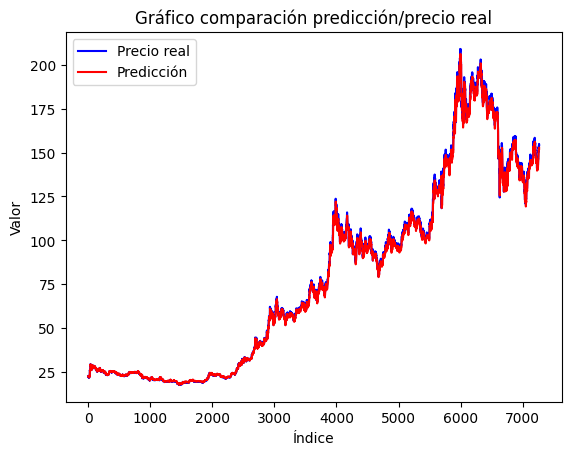

In [ ]:
plt.plot(y_valiLSTM, color='blue', label='Precio real')  # Línea azul
plt.plot(y_predLSTM, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [ ]:
suma = 0
n = len(y_valiLSTM)
mae = np.mean(np.abs(y_valiLSTM - y_predLSTM))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_predLSTM[i] - y_valiLSTM[i])/y_valiLSTM[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.062296458233036
El error medio porcentualemente es: 1.1689613664717091


Guardamos el modelo de la red

In [ ]:
modelLSTM.save('mi_modelo_lstm5_6.h5')

Hacemos una predicción usando los datos de test

In [ ]:
y_predLSTMt = modelLSTM.predict(X_testLSTM)
y_predLSTMt = y_predLSTMt.flatten()

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step


Comparamos la predicción con los datos reales de ese periodo

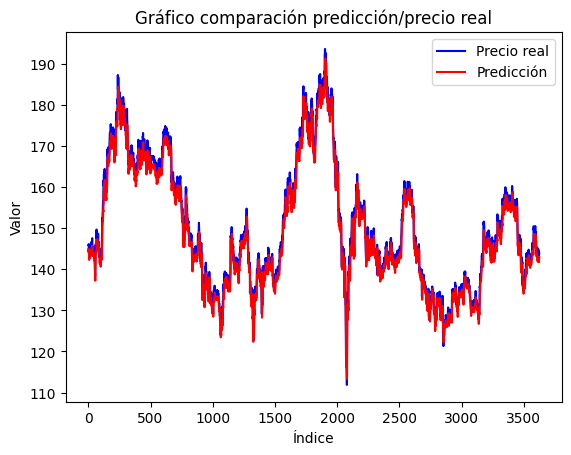

In [ ]:
plt.plot(y_testLSTM, color='blue', label='Precio real')  # Línea azul
plt.plot(y_predLSTMt, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [ ]:
suma = 0
n = len(y_testLSTM)
mae = np.mean(np.abs(y_testLSTM - y_predLSTMt))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_predLSTMt[i] - y_testLSTM[i])/y_testLSTM[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.6992025175949619
El error medio porcentualemente es: 1.1218533703591365
